# ONU: Objetivos de desarrollos sostenible

<img src="https://www.un.org/sustainabledevelopment/wp-content/uploads/sites/3/2015/01/S-SDG-Poster_-Letter.jpg" width=600>

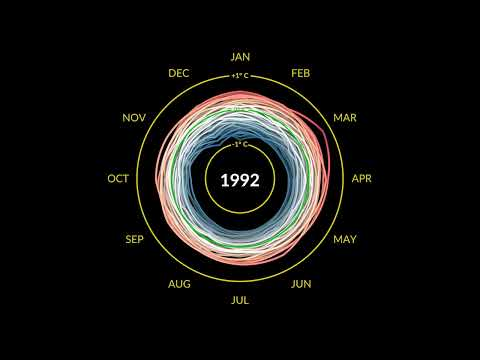

In [1]:
id="jWoCXLuTIkI"

# NASA, Climate Spiral
from IPython.display import YouTubeVideo
YouTubeVideo(id)

# Web Scrapping

<img src="https://www.slideteam.net/media/catalog/product/cache/1280x720/b/i/big_data_analytics_funnel_with_benefits_slide01.jpg" width=700>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# https://ecobici.cdmx.gob.mx/en/open-data/

# https://beautiful-soup-4.readthedocs.io/en/latest/#
!pip install beautifulsoup4
from bs4 import BeautifulSoup

# https://requests.readthedocs.io/en/latest/
import requests

In [4]:
url="https://ecobici.cdmx.gob.mx/en/open-data/"

In [5]:
# Response 200 -> Ok
# Response 40$, 50$ -> Bad response
requests.get(url)

<Response [200]>

In [6]:
page=requests.get(url)
page.content

b'<!DOCTYPE html>\n<html dir="ltr" lang="en-US"\n\tprefix="og: https://ogp.me/ns#" >\n<head>\n\t<meta charset="UTF-8">\n\t<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no"/>\n\t<meta name="format-detection" content="telephone=no"/>\n\t<link rel="profile" href="http://gmpg.org/xfn/11">\n\t<link rel="pingback" href="/xmlrpc.php">\n  \t\n\t\n\t<title>Open Data - Ecobici</title>\n\n\t\t<!-- All in One SEO 4.2.6.1 - aioseo.com -->\n\t\t<meta name="description" content="Open data Real time data ECOBICI publishes the system data in real time on the availability of bicycles and cycle stations with the GBFS standard (General Bikeshare Feed Specification). This standard is conceptually designed to provide real-time system status and therefore does not provide historical information. The information is available through a feed in json" />\n\t\t<meta name="robots" content="max-image-preview:large" />\n\t\t<link rel="canonical" href="/en/open-dat

In [7]:
soup = BeautifulSoup(page.content, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html dir="ltr" lang="en-US" prefix="og: https://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no" name="viewport">
   <meta content="telephone=no" name="format-detection"/>
   <link href="http://gmpg.org/xfn/11" rel="profile"/>
   <link href="/xmlrpc.php" rel="pingback"/>
   <title>
    Open Data - Ecobici
   </title>
   <!-- All in One SEO 4.2.6.1 - aioseo.com -->
   <meta content="Open data Real time data ECOBICI publishes the system data in real time on the availability of bicycles and cycle stations with the GBFS standard (General Bikeshare Feed Specification). This standard is conceptually designed to provide real-time system status and therefore does not provide historical information. The information is available through a feed in json" name="description"/>
   <meta content="max-image-preview:large" name="robots"/>
   <link href="/en/open-data/" rel="canonical">
    <meta conte

In [8]:
ligas=soup.find_all("a")
type(ligas)

bs4.element.ResultSet

In [9]:
csvs=[]
for liga in ligas:
  csvs.append(liga.get("href"))
csvs=[csv for csv in csvs if "csv" in csv]
csvs

['/wp-content/uploads/2024/02/ecobici_2024_enero.csv',
 '/wp-content/uploads/2024/03/2024-02.csv',
 '/wp-content/uploads/2024/04/datos_abiertos_2024_03-1-1.csv',
 '/wp-content/uploads/2023/03/2023-01.csv',
 '/wp-content/uploads/2023/03/2023-02.csv',
 '/wp-content/uploads/2023/10/ecobici_2023_03.csv',
 '/wp-content/uploads/2023/10/ecobici_2023_04.csv',
 '/wp-content/uploads/2023/10/ecobici_2023_05.csv',
 '/wp-content/uploads/2023/10/ecobici_2023_06.csv',
 '/wp-content/uploads/2023/10/ecobici_2023_07.csv',
 '/wp-content/uploads/2023/10/ecobici_2023_08.csv',
 '/wp-content/uploads/2023/10/ecobici_2023_09.csv',
 '/wp-content/uploads/2023/11/datosabiertos_2023_octubre.csv',
 '/wp-content/uploads/2023/12/datosabiertos_2023_noviembre.csv',
 '/wp-content/uploads/2024/01/datos_abiertos_2023_diciembre.csv',
 '/wp-content/uploads/2022/07/2022-01.csv',
 '/wp-content/uploads/2022/07/2022-02.csv',
 '/wp-content/uploads/2022/07/2022-03.csv',
 '/wp-content/uploads/2022/07/2022-04.csv',
 '/wp-content/up

In [20]:
csvs_download=list(filter(lambda x: "2018" in x, csvs))
len(csvs_download)

12

In [21]:
csvs_download[0]

'/wp-content/uploads/2022/07/2018-01.csv'

In [22]:
import os

In [23]:
root="https://ecobici.cdmx.gob.mx/"
os.system('wget -O data.csv {0}{1}'.format(root,csvs_download[0]))

1

In [24]:
df=pd.read_csv("data.csv")
df

FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

In [ ]:
df.dtypes

In [16]:
df["Fecha_Retiro"]=pd.to_datetime(df["Fecha_Retiro"], dayfirst=True)
df["Fecha_Arribo"]=pd.to_datetime(df["Fecha_Arribo"], dayfirst=True)

NameError: name 'df' is not defined

In [17]:
df["Fecha_Retiro"].min(), df["Fecha_Retiro"].max()

NameError: name 'df' is not defined

In [18]:
df["Fecha_Arribo"].min(), df["Fecha_Arribo"].max()

NameError: name 'df' is not defined

In [19]:
df=df[df["Fecha_Retiro"].dt.year==2018]
df.reset_index(drop=True, inplace=True)


NameError: name 'df' is not defined

In [ ]:
import plotly.express as px
fig = px.pie(df, names='Genero_Usuario', title='Genero Usuarios Ecobici')
fig.show()

In [13]:
fig = px.histogram(df[df["Edad_Usuario"]<80], x="Edad_Usuario")
fig.show()

NameError: name 'px' is not defined

In [ ]:
fig = px.histogram(df[df["Edad_Usuario"]<80], x="Edad_Usuario", color="Genero_Usuario", opacity=0.75,
                   title='Distribución de edades Usuarios Ecobici', barmode="overlay",
                   animation_frame="Fecha_Retiro", range_y=(0,1500))
fig.show()

Output hidden; open in https://colab.research.google.com to view.

# Other Sources

In [ ]:
# General Bikeshare Feed Specification
link=soup.find_all("a", # Tag
              # Tag modifiers:
              href=True, style="color: #6ac680;"
              )[0].get("href")
link

'https://gbfs.mex.lyftbikes.com/gbfs/gbfs.json'

In [ ]:
requests.get(link).content

b'{"last_updated":1714516014,"ttl":2,"data":{"en":{"feeds":[{"name":"system_information","url":"https://gbfs.mex.lyftbikes.com/gbfs/en/system_information.json"},{"name":"station_information","url":"https://gbfs.mex.lyftbikes.com/gbfs/en/station_information.json"},{"name":"station_status","url":"https://gbfs.mex.lyftbikes.com/gbfs/en/station_status.json"},{"name":"free_bike_status","url":"https://gbfs.mex.lyftbikes.com/gbfs/en/free_bike_status.json"},{"name":"system_alerts","url":"https://gbfs.mex.lyftbikes.com/gbfs/en/system_alerts.json"}]},"es":{"feeds":[{"name":"system_information","url":"https://gbfs.mex.lyftbikes.com/gbfs/es/system_information.json"},{"name":"station_information","url":"https://gbfs.mex.lyftbikes.com/gbfs/es/station_information.json"},{"name":"station_status","url":"https://gbfs.mex.lyftbikes.com/gbfs/es/station_status.json"},{"name":"free_bike_status","url":"https://gbfs.mex.lyftbikes.com/gbfs/es/free_bike_status.json"},{"name":"system_alerts","url":"https://gbfs.

In [ ]:
for val in eval(requests.get(link).text)["data"]["en"]["feeds"]:
  print(val["url"])

https://gbfs.mex.lyftbikes.com/gbfs/en/system_information.json
https://gbfs.mex.lyftbikes.com/gbfs/en/station_information.json
https://gbfs.mex.lyftbikes.com/gbfs/en/station_status.json
https://gbfs.mex.lyftbikes.com/gbfs/en/free_bike_status.json
https://gbfs.mex.lyftbikes.com/gbfs/en/system_alerts.json


In [ ]:
requests.get(link).text

'{"last_updated":1714516014,"ttl":2,"data":{"en":{"feeds":[{"name":"system_information","url":"https://gbfs.mex.lyftbikes.com/gbfs/en/system_information.json"},{"name":"station_information","url":"https://gbfs.mex.lyftbikes.com/gbfs/en/station_information.json"},{"name":"station_status","url":"https://gbfs.mex.lyftbikes.com/gbfs/en/station_status.json"},{"name":"free_bike_status","url":"https://gbfs.mex.lyftbikes.com/gbfs/en/free_bike_status.json"},{"name":"system_alerts","url":"https://gbfs.mex.lyftbikes.com/gbfs/en/system_alerts.json"}]},"es":{"feeds":[{"name":"system_information","url":"https://gbfs.mex.lyftbikes.com/gbfs/es/system_information.json"},{"name":"station_information","url":"https://gbfs.mex.lyftbikes.com/gbfs/es/station_information.json"},{"name":"station_status","url":"https://gbfs.mex.lyftbikes.com/gbfs/es/station_status.json"},{"name":"free_bike_status","url":"https://gbfs.mex.lyftbikes.com/gbfs/es/free_bike_status.json"},{"name":"system_alerts","url":"https://gbfs.m

In [ ]:
gbfs_links=eval(requests.get(link).text)["data"]["en"]["feeds"]
gbfs_link=list(filter(lambda x: "station_info" in x, [link["url"] for link in gbfs_links]))[0]

In [ ]:
# Reading station data
stations=pd.DataFrame(pd.read_json(gbfs_link).iloc[0,-1]).loc[:,["station_id", "lat", "lon"]]
stations=stations.iloc[:-2,:]
stations.station_id=stations.station_id.astype(int)
stations

,station_id,lat,lon
0,5,19.367266,-99.158656
1,6,19.363404,-99.160395
2,7,19.364906,-99.162987
3,8,19.359583,-99.162085
4,9,19.367816,-99.175269
...,...,...,...
661,678,19.460836,-99.171151
662,681,19.459686,-99.181778
663,682,19.460494,-99.167270
664,683,19.361792,-99.171471


In [ ]:
import geopandas as gpd
cdmx_url="https://raw.githubusercontent.com/PhantomInsights/mexico-geojson/main/2022/states/Ciudad%20de%20M%C3%A9xico.json"
cdmx=gpd.read_file(cdmx_url)
cdmx.head()

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,NOM_ENT,COV_,COV_ID,AREA,PERIMETER,geometry
0,09003,09,003,Coyoacán,Ciudad de México,275,276,5362.231427,33293.881387,"POLYGON ((-99.13984 19.35692, -99.13923 19.356..."
1,09007,09,007,Iztapalapa,Ciudad de México,276,277,11252.806399,55993.681263,"POLYGON ((-99.05813 19.40072, -99.05814 19.400..."
2,09008,09,008,La Magdalena Contreras,Ciudad de México,277,278,6307.476712,47546.085775,"POLYGON ((-99.21993 19.31226, -99.22047 19.311..."
3,09009,09,009,Milpa Alta,Ciudad de México,278,279,29672.886592,76023.989271,"POLYGON ((-98.96853 19.21057, -98.96838 19.210..."
4,09010,09,010,Álvaro Obregón,Ciudad de México,279,280,9535.832693,78321.140148,"POLYGON ((-99.18906 19.39559, -99.18871 19.394..."


In [ ]:
cdmx.NOMGEO.unique()

array(['Coyoacán', 'Iztapalapa', 'La Magdalena Contreras', 'Milpa Alta',
       'Álvaro Obregón', 'Tláhuac', 'Tlalpan', 'Xochimilco', 'Iztacalco',
       'Cuauhtémoc', 'Venustiano Carranza', 'Azcapotzalco',
       'Miguel Hidalgo', 'Gustavo A. Madero', 'Cuajimalpa de Morelos',
       'Benito Juárez'], dtype=object)

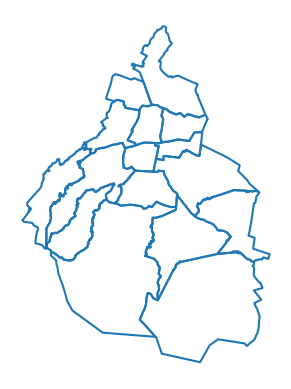

In [ ]:
cdmx.boundary.plot()
plt.axis("off")
plt.show()

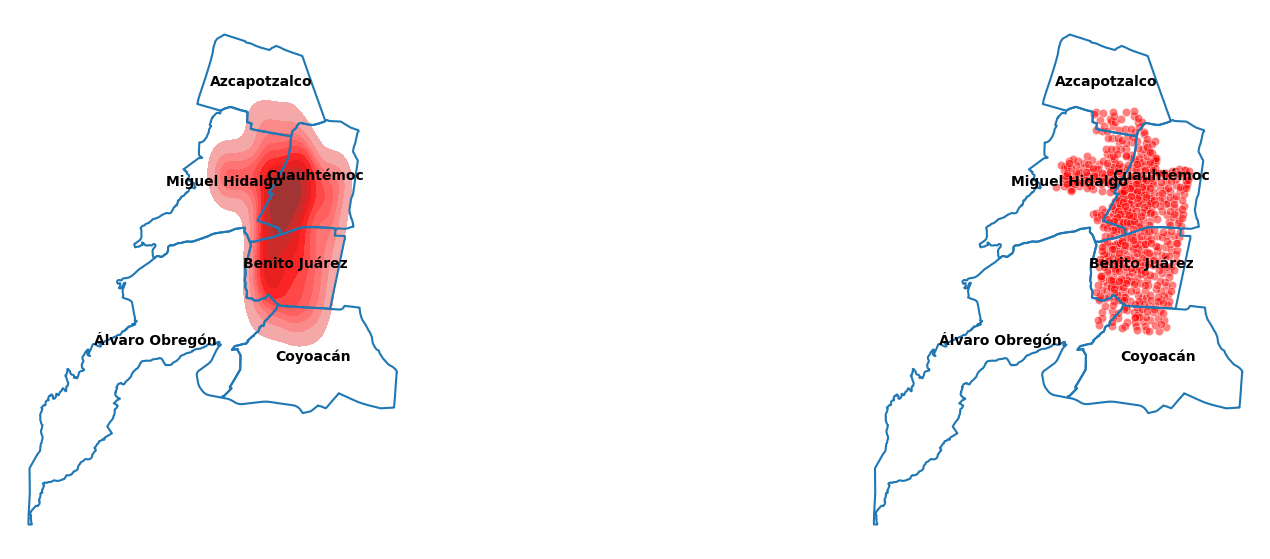

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(20,7))

alcaldias=cdmx[cdmx.NOMGEO.isin(['Azcapotzalco', 'Benito Juárez', 'Cuauhtémoc',
                                 'Miguel Hidalgo', 'Coyoacán', 'Álvaro Obregón'])]
for i in range(2):
  alcaldias.boundary.plot(ax=axs[i])
  alcaldias.apply(lambda x: axs[i].annotate(text=x.NOMGEO, xy=x.geometry.centroid.coords[0],
                                       ha='center', color = "black", weight='semibold'), axis=1)
  axs[i].axis("off")
sns.kdeplot(data=stations, x="lon", y="lat", color="Red", fill=True, ax= axs[0])
sns.scatterplot(data=stations, x="lon", y="lat", color="Red", alpha=0.5, ax= axs[1])
plt.show()

# Principios Gestalt

<img src="https://vizzendata.com/wp-content/uploads/2019/07/gestalt-principles.png?w=810" width=800>

In [ ]:
X=np.linspace(3,15,4)
y=np.linspace(3,27,4)
X, y

(array([ 3.,  7., 11., 15.]), array([ 3., 11., 19., 27.]))

In [ ]:
combs=[]
for i in X:
  for j in y:
    combs.append(tuple((i,j)))
len(combs)

16

In [ ]:
circles=pd.DataFrame(combs, columns=["X", "Y"])
circles["colors"]=["Red" if n%2==0 else "Blue" for n in range(circles.shape[0])]

In [ ]:
os.system("wget -O logo.png https://upload.wikimedia.org/wikipedia/commons/f/f8/Logo_Ecobici_con_Movilidad_Integrada.png")

0

In [ ]:
from PIL import Image
pic=Image.open("logo.png")
logo=np.asarray(pic)

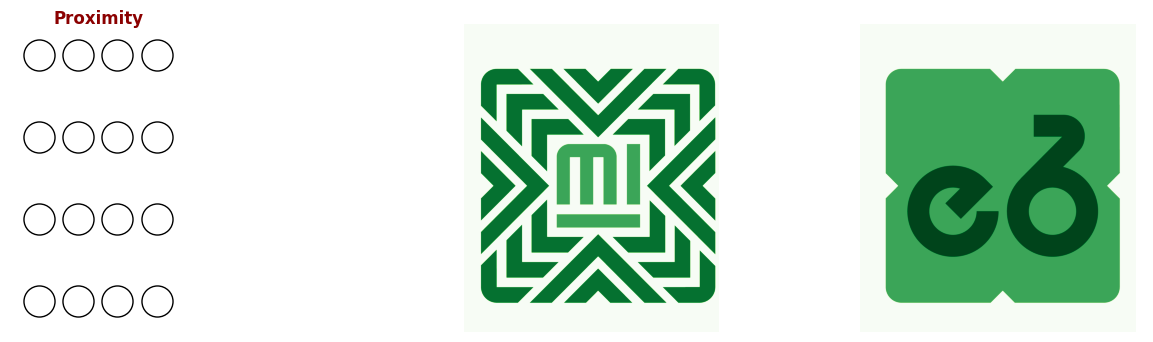

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(15,4))
axs[0].scatter(circles["X"], circles["Y"], s=500, color="White",
               edgecolor="Black")
axs[0].set_xlim(0,35)
axs[0].set_ylim(0,30)
axs[0].axis("off")
axs[0].text(4.5, 30, "Proximity",
            fontdict={"size":12, "weight":"bold", "color":"DarkRed"})

axs[1].imshow(logo, cmap="Greens")
axs[1].axis("off")
axs[1].set_xlim(0,1300)
axs[2].imshow(logo, cmap="Greens")
axs[2].axis("off")
axs[2].set_xlim(1300,2750)
plt.show()

In [ ]:
station_count_gen=df.groupby(["Ciclo_Estacion_Retiro"]).count()["Bici"].reset_index()
top_10_stations=station_count_gen.sort_values("Bici", ascending=False).head(10)["Ciclo_Estacion_Retiro"].values
top_10_data=df[df.Ciclo_Estacion_Retiro.isin(top_10_stations)]
top_10_count=top_10_data.groupby(["Ciclo_Estacion_Retiro", "Genero_Usuario"]).count()["Bici"].reset_index()
top_10_count.head()

,Ciclo_Estacion_Retiro,Genero_Usuario,Bici
0,1,F,1810
1,1,M,5510
2,14,F,1018
3,14,M,3830
4,16,F,1139


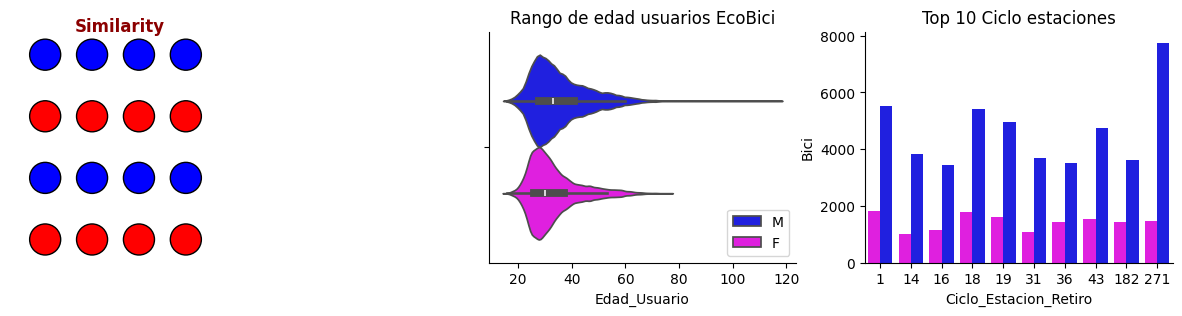

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(15,3), gridspec_kw={'hspace': 0,
                                                          'wspace': 0.2,
                                                          'width_ratios': [2, 1.5, 1.5]})
axs[0].scatter(circles["X"], circles["Y"], s=500, color=circles["colors"],
               edgecolor="Black")
axs[0].set_xlim(0,35)
axs[0].set_ylim(0,30)
axs[0].axis("off")
axs[0].text(5.5, 30, "Similarity",
            fontdict={"size":12, "weight":"bold", "color":"DarkRed"})

sns.violinplot(data=df, x="Edad_Usuario", hue="Genero_Usuario", ax= axs[1], palette=["Blue", "Magenta"])
axs[1].spines[['right', 'top']].set_visible(False)
axs[1].set_title("Rango de edad usuarios EcoBici")
axs[1].legend(loc='lower right')
sns.barplot(data=top_10_count, x="Ciclo_Estacion_Retiro", y="Bici", hue="Genero_Usuario", ax= axs[2],
            palette=["Magenta", "Blue"])
axs[2].get_legend().remove()
axs[2].spines[['right', 'top']].set_visible(False)
axs[2].set_title("Top 10 Ciclo estaciones")
plt.show()

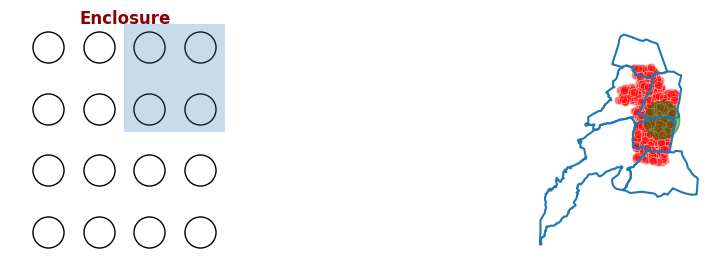

In [ ]:
from matplotlib.patches import Rectangle, Circle
fig, axs = plt.subplots(1,2, figsize=(10,3), gridspec_kw={'hspace': 0,
                                                          'wspace': 0,
                                                          'width_ratios': [2, 1.5]})
axs[0].scatter(circles["X"], circles["Y"], s=500, color ="White", edgecolor="Black")
axs[0].set_xlim(0,35)
axs[0].set_ylim(0,30)
axs[0].axis("off")
axs[0].text(5.5, 30, "Enclosure",
            fontdict={"size":12, "weight":"bold", "color":"DarkRed"})
r=Rectangle((9,16), 8, 14.5, alpha=0.25)
axs[0].add_patch(r)

alcaldias.boundary.plot(ax=axs[1])
sns.scatterplot(data=stations, x="lon", y="lat", color="Red", alpha=0.5, ax= axs[1])
c=Circle((-99.15,19.4), 0.025, alpha=0.5, color="Green")
axs[1].add_patch(c)
axs[1].axis("off")
plt.show()

In [ ]:
day_count=df.groupby("Fecha_Retiro").count()["Bici"].reset_index()
day_count.head()

,Fecha_Retiro,Bici
0,2018-01-01,3402
1,2018-01-02,18537
2,2018-01-03,22255
3,2018-01-04,23565
4,2018-01-05,23091


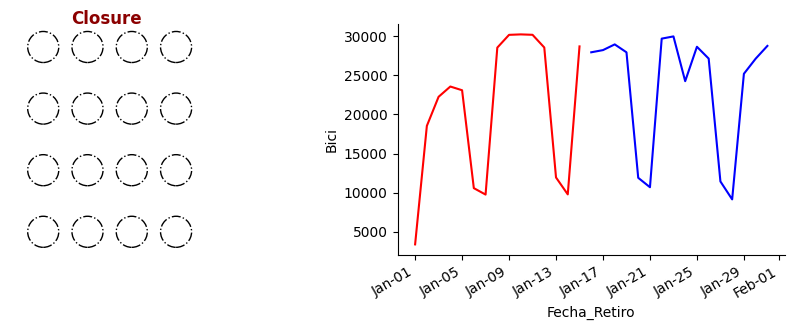

In [ ]:
import matplotlib.dates as mdates
fig, axs = plt.subplots(1,2, figsize=(10,3), gridspec_kw={'hspace': 0,
                                                          'wspace': 0,
                                                          'width_ratios': [1, 1]})
axs[0].scatter(circles["X"], circles["Y"], s=500, color ="White", edgecolor="Black", linestyle="-.")
axs[0].set_xlim(0,35)
axs[0].set_ylim(0,30)
axs[0].axis("off")
axs[0].text(5.5, 30, "Closure",
            fontdict={"size":12, "weight":"bold", "color":"DarkRed"})
dates=[day for n, day in enumerate(day_count["Fecha_Retiro"]) if n%5==0]
sns.lineplot(data=day_count.iloc[:15,:], x="Fecha_Retiro", y="Bici",
             color="Red", ax= axs[1])
sns.lineplot(data=day_count.iloc[15:,:], x="Fecha_Retiro", y="Bici",
             color="Blue", ax= axs[1])
# Las etiquetas en el eje de las X se mostrarán con el formato 'mm-day'.
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
# Rotamos y alineamos las etiquetas en el eje de las X para que no aparezcan encimadas.
for label in axs[1].get_xticklabels(which='major'):
    label.set(rotation=30, ha='right')
axs[1].spines[['right', 'top']].set_visible(False)
plt.show()

In [ ]:
day_count_gen=df.groupby(["Fecha_Retiro", "Genero_Usuario"]).count()["Bici"].reset_index()
day_count_gen.head()

,Fecha_Retiro,Genero_Usuario,Bici
0,2018-01-01,F,684
1,2018-01-01,M,2718
2,2018-01-02,F,4170
3,2018-01-02,M,14367
4,2018-01-03,F,5264


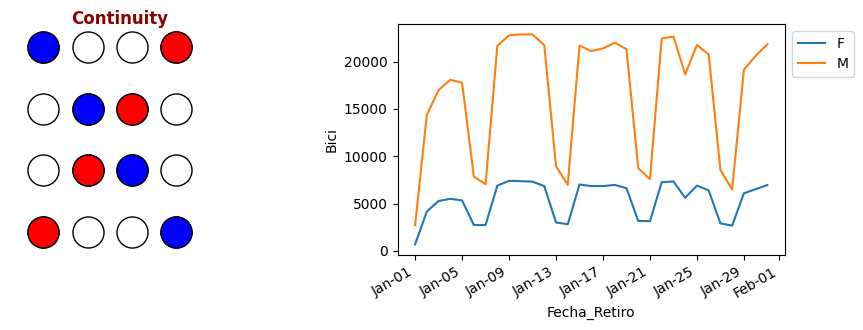

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(10,3), gridspec_kw={'hspace': 0,
                                                          'wspace': 0,
                                                          'width_ratios': [1, 1]})
axs[0].scatter(circles["X"], circles["Y"], s=500, color ="White", edgecolor="Black")
axs[0].scatter(circles["X"][[0,5,10,15]], circles["Y"][[0,5,10,15]],
               s=500, color ="Red", edgecolor="Black")
axs[0].scatter(circles["X"][[3,6,9,12]], circles["Y"][[3,6,9,12]],
               s=500, color ="Blue", edgecolor="Black")
axs[0].set_xlim(0,35)
axs[0].set_ylim(0,30)
axs[0].axis("off")
axs[0].text(5.5, 30, "Continuity",
            fontdict={"size":12, "weight":"bold", "color":"DarkRed"})
dates=[day for n, day in enumerate(day_count["Fecha_Retiro"]) if n%5==0]

sns.lineplot(data=day_count_gen, x="Fecha_Retiro", y="Bici",
             color="Blue", ax= axs[1], hue="Genero_Usuario")
# Las etiquetas en el eje de las X se mostrarán con el formato 'mm-day'.
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
# Rotamos y alineamos las etiquetas en el eje de las X para que no aparezcan encimadas.
for label in axs[1].get_xticklabels(which='major'):
    label.set(rotation=30, ha='right')
axs[1].legend(bbox_to_anchor=(1,1))
plt.show()

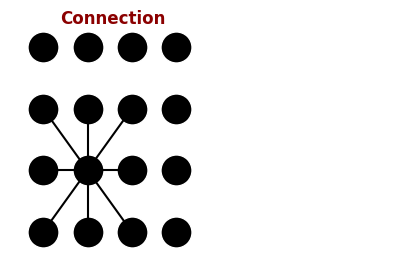

In [180]:
fig, axs = plt.subplots(figsize=(5,3))
c_con=[[0,5], [1,5], [2,5], [4,5], [6,5], [8,5], [9,5], [10,5],]
for c in c_con:
  axs.plot(circles["X"][c], circles["Y"][c], color ="Black")
axs.scatter(circles["X"], circles["Y"], s=500, color ="Black", edgecolor="White")

axs.set_xlim(0,35)
axs.set_ylim(0,30)
axs.axis("off")
axs.text(4.5, 30, "Connection",
            fontdict={"size":12, "weight":"bold", "color":"DarkRed"})
plt.show()

In [181]:
# https://networkx.org/documentation/stable/index.html
!pip install networkx
import networkx as nx

In [223]:
connections=df.groupby(["Ciclo_Estacion_Retiro", "Ciclo_Estacion_Arribo"]).count()["Bici"].reset_index()
connections.columns=["Source", "Target", "Freq"]
top_250=connections.sort_values("Freq", ascending=False).head(250)
top_250.reset_index(drop=True, inplace=True)
top_250

,Source,Target,Freq
0,18,1,589
1,211,217,569
2,1,18,488
3,217,211,430
4,208,242,415
...,...,...,...
245,180,182,120
246,242,204,120
247,18,28,120
248,24,1,120


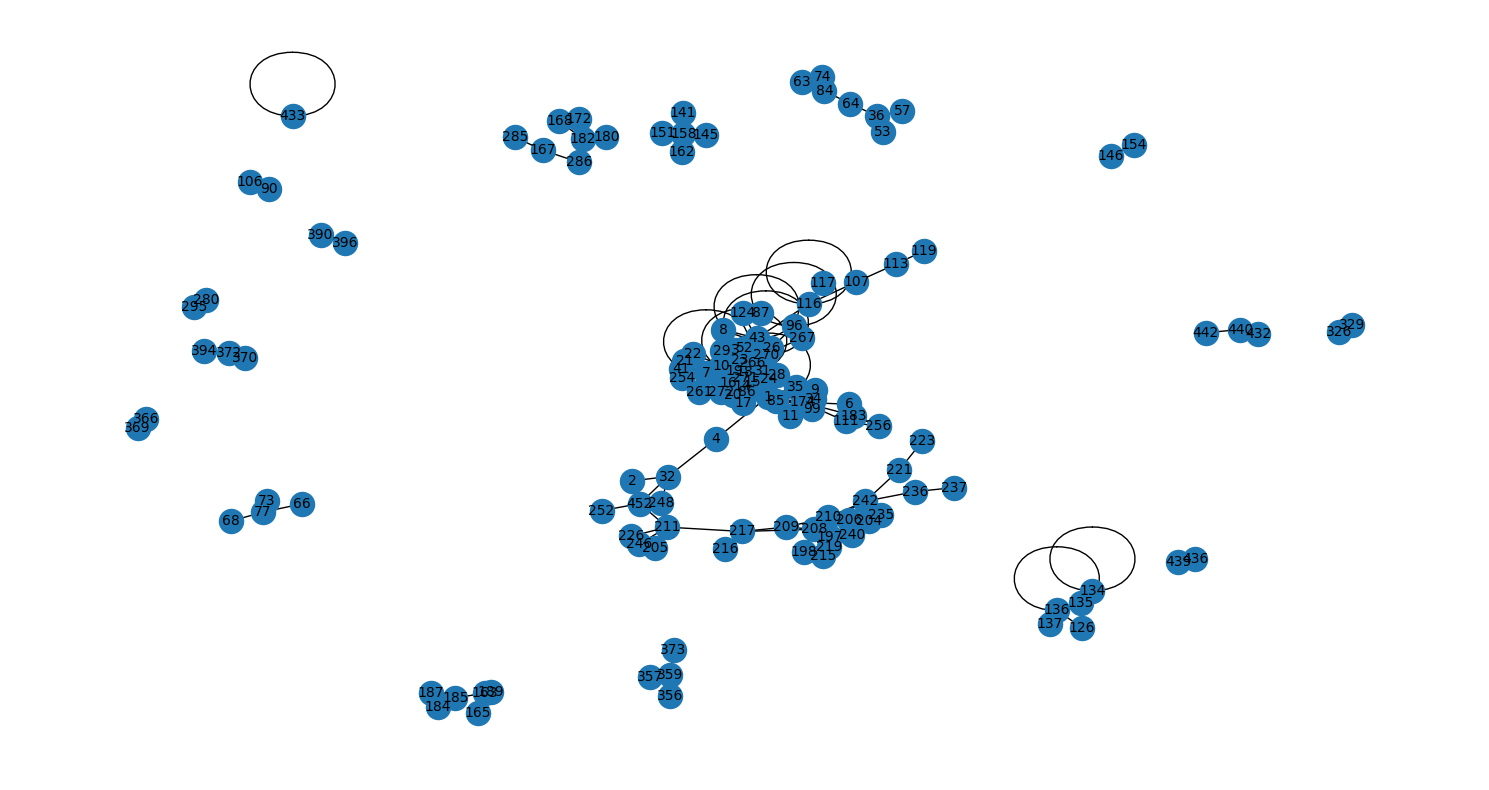

In [236]:
np.random.seed(10)
#Create a blank graph page
nxG = nx.Graph()

#Add edges
for n in range(len(top_250)):
  x=top_250["Source"][n]
  y=top_250["Target"][n]
  nxG.add_edge(x, y)

#Draw graph
fig, axs = plt.subplots(figsize=(15,8))
nx.draw(nxG, with_labels=True, font_size=10, ax=axs)
plt.tight_layout()
plt.show()

In [237]:
top_250.head()

,Source,Target,Freq
0,18,1,589
1,211,217,569
2,1,18,488
3,217,211,430
4,208,242,415


# Recursos adicionales:

*   https://python-graph-gallery.com/
*   https://pillow.readthedocs.io/en/stable/
*   https://nastengraph.medium.com/gestalt-principles-in-data-visualization-a4e56e6074b5
*   https://towardsdatascience.com/the-next-level-of-data-visualization-in-python-dd6e99039d5e
*   https://algrx.github.io/docs/python/index.html